## Introduction

We will be applying machine learning techniques to predict a car's market price using its attributes.

The data set is from the UCI Machine Learning Repository, full documentation and download could be found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
# import and read file
import pandas as pd

with open('imports-85.data') as f:
    cars = pd.read_csv(f)

In [2]:
# exploring data
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The column labels are missing from the data set and the first row of data has been read as the label currently. We should add the labels back.

We also find that null values are entered as '?' in this data set, this is not within the default setting, so should be specified when reading in the data set as well.

In [3]:
# reading the file again and adding column labels
col_lab = ['symboling',
           'normalized_losses',
           'make',
           'fuel_type',
           'aspiration',
           'num_of_doors',
           'body_style',
           'drive_wheels',
           'engine_location',
           'wheel_base',
           'length',
           'width',
           'height',
           'curb_weight',
           'engine_type',
           'num_of_cynlinders',
           'engine_size',
           'fuel_system',
           'bore',
           'stroke',
           'compression_ratio',
           'horsepower',
           'peak_rpm',
           'city_mpg',
           'highway_mpg',
           'price'
          ]
with open('imports-85.data') as f:
    cars = pd.read_csv(f, header=None, names=col_lab, na_values='?')

In [4]:
# exploring column dtype
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cynlinders    205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [5]:
# counting unique dtypes of data set
cars.get_dtype_counts()

float64    11
int64       5
object     10
dtype: int64

Since we are trying to predict car's price, hence the target column should be 'price'.

Out of the 25 remaining columns, there are 15 that are currently of numeric dtypes that could be used as features for our model. However, we could increase the number by transforming columns such as 'num_of_doors', 'num_of_cylinders' to numeric dtypes, and also create dummies for categorical columns such as 'body_style', 'drive_wheels', 'fuel_system'... ect.

In [6]:
# display the first few rows
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Data Cleaning

As predictive modelling generally does not accept non-numeric data and missing values, hence we will need to clean the data first.

For the purpose of this project, we will only use the columns specified as continuous values. As mentioned before, we found that non-numeric columns in this data set are categorical, thus, we could create dummy variables for these columns to enhance the robustness of our model. However, we will only be using the numeric ones for our initial models. Inclusion of dummy variables will be kept as a possible step for model improvement.

In [7]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars_num = cars[continuous_values_cols]

In [8]:
# finding number of missing values for selected columns
cars_num.isna().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

From the initial data exploration, we find the column 'normalized_losses' missing 20% of its values (164 out of 205 values). When reading the definition we learn that this column "records the relative average loss payment per insured vehicle year." (quoted from [data set information](https://archive.ics.uci.edu/ml/datasets/automobile)) As insurance losses data affects the second hand car market more and that there are too many missing values in this column, we will drop the column entirely.

We see that other columns are missing 4 values at most, hence we will fill in the numeric columns with the column means.

Though we find that our target column 'price' is also missing 4 values. As it is the target column, we will be more cautious when handelling missing values here as any inaccuracy will lead to poor predicative results. Seeing that there are only 4 missing price values, we will drop theses rows entirely.

After dropping non-numeric columns, we will normalise the remaining columns because gradient based predicative modelling techniques find it harder to reach convergence with unscaled data. We will keep the normalised range between 0 and 1.

We will not normalise the price column as it is our target column.

In [9]:
# dropping 'normalized_losses'
cars_num = cars_num.drop(columns='normalized_losses')

In [10]:
# dropping rows with missing prices
cars_num = cars_num[cars_num['price'].notna()]

In [11]:
# fill missing values for numeric dtype
for col in cars_num.columns:
    if cars_num[col].isna().sum() > 0:
        if (cars_num[col].dtype != 'object'):
            cars_num[col].fillna(value=cars_num[col].mean(), inplace=True)

In [12]:
# normalising remaining features columns (but not the target)
price_col = cars_num['price']
cars_num = (cars_num - cars_num.min())/(cars_num.max() - cars_num.min())
cars_num['price'] = price_col

In [13]:
# verifying no more missing values
cars_num.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Univariate Model

We will start with k-nearest neighbors models.

In [14]:
# import necessary modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def knn_train_test(features, target, df):
    np.random.seed(1) # so that results could be reproduced
    
    # randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index) # we need to reindex our data or will run into issues later
    
    # splitting the data set
    cut_off = int(0.8 * len(rand_df))
    train = rand_df.iloc[0:cut_off]
    test = rand_df.iloc[cut_off:]
    
    # instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # fit model
    knn.fit(train[[features]], train[target])
    
    # predict test set
    predictions = knn.predict(test[[features]])
    
    # calculate and return RMSE of model
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [15]:
# train and test univariate models using different numeric columns
results = {}

for feat in cars_num.columns.drop('price'):
    rmse = knn_train_test(features=feat, target='price', df=cars_num)
    results[feat] = rmse
    
# list out the results in order of descent
sorted(results.items(), key=lambda kv: kv[1])

[('curb_weight', 3542.232503971912),
 ('city_mpg', 4004.261065171548),
 ('width', 4289.527857923577),
 ('highway_mpg', 4425.000531789963),
 ('wheel_base', 4692.348776153917),
 ('horsepower', 5037.249086458241),
 ('length', 5776.389428041555),
 ('compression_ratio', 5823.942730470903),
 ('peak_rpm', 7039.66106466539),
 ('height', 7114.46647188053),
 ('stroke', 8509.786245459673),
 ('bore', 8570.096663996499)]

We find that the model trained on 'curb_weight' offers the lowest RMSE, hence it is the best univariate model.

In [16]:
# modify univariate model to tune hyperparameter

def knn_train_test(features, target, df):
    np.random.seed(1)
    
    # randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index) # we need to reindex our data or will run into issues later
    
    # splitting the data set
    cut_off = int(0.8 * len(rand_df))
    train = rand_df.iloc[0:cut_off]
    test = rand_df.iloc[cut_off:]
    
    # tuning hyperparameter
    result_uni_k = {}
    for i in range(1,10,2):
        
        # instantiate the KNeighborsRegressor class, allow neibors count be specified
        knn = KNeighborsRegressor(n_neighbors=i)
        
        # fit model
        knn.fit(train[[features]], train[target])
       
        # predict test set
        predictions = knn.predict(test[[features]])
        
        # calculate and return RMSE of model
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        result_uni_k[i] = rmse
        
    return result_uni_k

In [17]:
# find rmse for univariate models with different k values
results_uni_k = {}

for feat in cars_num.columns.drop('price'):
    k_rmse = knn_train_test(features=feat, target='price', df=cars_num)
    results_uni_k[feat] = k_rmse
    
results_uni_k

{'bore': {1: 11325.623045371662,
  3: 11020.816129115008,
  5: 8570.096663996499,
  7: 8365.797896227094,
  9: 8775.94193557989},
 'city_mpg': {1: 4974.416639409995,
  3: 3928.700182242369,
  5: 4004.261065171548,
  7: 4081.310648036243,
  9: 4339.190601157172},
 'compression_ratio': {1: 7799.828345515829,
  3: 6163.730431482084,
  5: 5823.942730470903,
  7: 6157.7248722066115,
  9: 6407.497099828602},
 'curb_weight': {1: 4185.38209637817,
  3: 3865.4854755980678,
  5: 3542.232503971912,
  7: 3648.8946863476,
  9: 3902.9189076894745},
 'height': {1: 6148.6606790699925,
  3: 7574.277044037761,
  5: 7114.46647188053,
  7: 7059.4162099980385,
  9: 7112.208123377993},
 'highway_mpg': {1: 6099.731359538433,
  3: 4905.003872215584,
  5: 4425.000531789963,
  7: 4250.7808647564025,
  9: 4668.313503523361},
 'horsepower': {1: 3403.51650646153,
  3: 4619.276254917126,
  5: 5037.249086458241,
  7: 5031.196660115028,
  9: 5062.637279256621},
 'length': {1: 5859.903974073794,
  3: 5888.568349894745

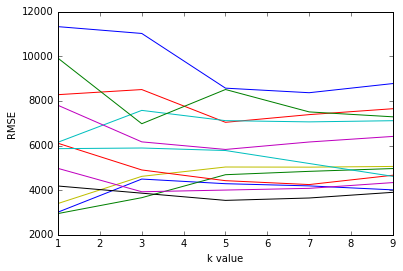

In [18]:
# plotting line plots
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in results_uni_k.items():
    x = []
    y = []
    for i in range(1,10,2):
        x.append(i)
        y.append(v[i])
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## results_uni_k.items() kept returning keys as 1,3,9,5,7 and messing up the plot
# for k,v in results_uni_k.items():
#     x = list(v.keys())
#     y = list(v.values())
#     plt.plot(x,y)

## Multivariate Model

We will now modify our model to take in multiple features.

In [19]:
# modifying model to take in multiple features
def knn_train_test(features, target, df):
    
    # randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index) # we need to reindex our data or will run into issues later
    
    # splitting the data set
    cut_off = round(0.8 * len(rand_df))
    train = rand_df.iloc[0:cut_off]
    test = rand_df.iloc[cut_off:]
    
    # instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # fit model
    knn.fit(train[features], train[target])
    
    # predict test set
    predictions = knn.predict(test[features])
    
    # calculate and return RMSE of model
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [20]:
# save ranked features in ascending order of RMSE from univariate model with k as default
sorted_results = sorted(results.items(), key=lambda kv: kv[1])

ranked_features = []

for entry in sorted_results:
    ranked_features.append(entry[0])

In [21]:
# train and test multivariate models using ranked numeric columns above
results_multi = {}

for i in range(2,6):
    rmse = knn_train_test(features=ranked_features[0:i], target='price', df=cars_num)
    results_multi['best_{}_features'.format(i)] = rmse
    
results_multi

{'best_2_features': 3826.7704409854537,
 'best_3_features': 2746.850693066516,
 'best_4_features': 3479.123133635831,
 'best_5_features': 4794.261572964078}

We find that the more features we allow our model to be fitted around, the smaller our RMSE will get. Hence, the three models with the lowest RMSE are the best_5, best_4 and best_3 in order.

## Hyperparameter Tuning

We will now optimise the top 3 best performing multivariate models from the last step by varying the hyperparameter value.

In [22]:
# modify multivariate model to tune hyperparameter

def knn_train_test(features, target, df):
    np.random.seed(1)
    
    # randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index) # we need to reindex our data or will run into issues later
    
    # splitting the data set
    cut_off = int(0.8 * len(rand_df))
    train = rand_df.iloc[0:cut_off]
    test = rand_df.iloc[cut_off:]
    
    # tuning hyperparameter
    result_multi_k = {}
    for i in range(1,26):
        
        # instantiate the KNeighborsRegressor class, allow neibors count be specified
        knn = KNeighborsRegressor(n_neighbors=i)
        
        # fit model
        knn.fit(train[features], train[target])
       
        # predict test set
        predictions = knn.predict(test[features])
        
        # calculate and return RMSE of model
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
        result_multi_k[i] = rmse
        
    return result_multi_k

In [23]:
# train and test multivariate models with different k values using ranked numeric columns above
results_multi_k = {}

for i in range(5,2,-1):
    rmse = knn_train_test(features=ranked_features[0:i], target='price', df=cars_num)
    results_multi_k['best_{}_features'.format(i)] = rmse
    
results_multi_k

{'best_3_features': {1: 2440.7687613416933,
  2: 2151.763056193688,
  3: 2306.280139380473,
  4: 2396.4457475679656,
  5: 2494.3827554590953,
  6: 2651.891506771278,
  7: 2688.4519714859252,
  8: 2639.733555619702,
  9: 2724.0736646284354,
  10: 2768.231887624037,
  11: 2949.9146750034047,
  12: 3093.474283599701,
  13: 3037.8980250959376,
  14: 3320.45153150459,
  15: 3440.9790406763573,
  16: 3553.2083723888654,
  17: 3676.2375923874038,
  18: 3795.1541225504234,
  19: 3830.777406930596,
  20: 3838.2141839519904,
  21: 3968.817692741089,
  22: 4041.2503019141523,
  23: 4136.901636349504,
  24: 4201.125083254574,
  25: 4205.913823080602},
 'best_4_features': {1: 2341.188295320635,
  2: 2295.7616489480106,
  3: 2626.9177880247134,
  4: 2649.2663066242762,
  5: 2634.9624178372324,
  6: 2615.9331857387574,
  7: 2610.7740714899783,
  8: 2641.6536694606657,
  9: 2709.1509915750476,
  10: 2834.7206435684575,
  11: 2811.5463074944455,
  12: 3106.8741993875105,
  13: 3197.7940874210167,
  14:

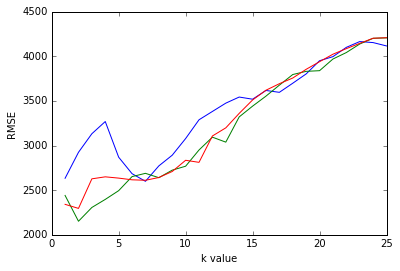

In [25]:
# plotting results
for k,v in results_multi_k.items():
    x = []
    y = []
    for i in range(1,26):
        x.append(i)
        y.append(v[i])
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

It would seem that k values over 7 will only result in a larger error.

For the model using the top 3 features (blue), optimal k is around 7. For top 4 and top 5 model (green, red), the optimal k is at 2.